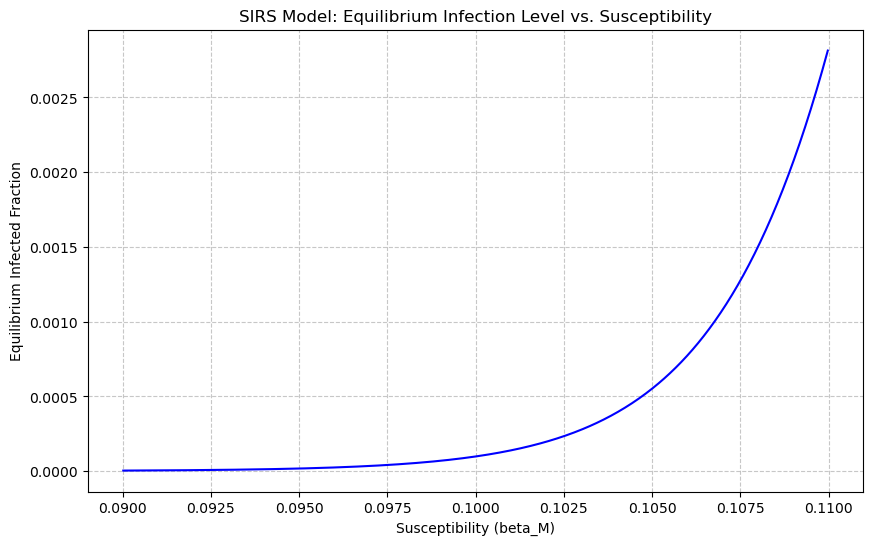

In [36]:
from src.utils.batch_sweep import sweep_one_parameter
from src.models import SIRS  # Import your new SIRS module

# Define parameter range for susceptibility (beta_M)
beta_range = {"m": 0.09, "M": 0.11, "n": 501}  # Min, max, number of points

# Set custom parameters for the simulation
custom_params = {
    'recovery_rate': 0.1,      # Recovery rate
    'waning_rate': 0.01,       # Waning rate
    'simulated_days': 1*356     # Long enough to reach equilibrium
}

# Run the parameter sweep
results = sweep_one_parameter(
    model_module=SIRS,
    param_name="beta_M",       # Parameter to sweep
    param_range=beta_range,    # Range of values
    custom_base_params=custom_params,
    population_size=1,
    simulated_days = 1*356,     # Long enough to reach equilibrium
    batch_size=500
)

# Plot the results - final infected fraction vs. susceptibility
import matplotlib.pyplot as plt
import numpy as np

# Extract data
susceptibility_values = results['parameter_values']
infected_fractions = np.array(np.sum(results['final_state']['I'], axis=1))

plt.figure(figsize=(10, 6))
plt.plot(susceptibility_values, infected_fractions,  color='blue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Susceptibility (beta_M)')
plt.ylabel('Equilibrium Infected Fraction')
plt.title('SIRS Model: Equilibrium Infection Level vs. Susceptibility')
plt.show()

In [34]:
print(infected_fractions)

[6.69655197e-35 8.13181660e-32 9.53309322e-29 1.07910822e-25
 1.17987086e-22 1.24638231e-19 1.27224110e-16 1.25479529e-13
 1.19490848e-10 1.09279235e-07 8.71088560e-05 4.19295719e-03
 7.92223494e-03 1.13455718e-02 1.45600541e-02 1.74695179e-02
 2.02089995e-02 2.27299295e-02 2.50708237e-02 2.72753034e-02
 2.93300115e-02]
